In [1]:
import pymde

import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
# load the cooccurrence matrix from compressed npz file
# cooccurrence_matrix = np.load('./work/data/cooccurrence_matrix.npz')['arr_0']
# cooccurrence_matrix.shape

cooccurrence_matrix = np.load('./work/data/cooccurrence_matrix_wextra.npy')

In [3]:
cooccurrence_matrix[0]

array([0.00000000e+00, 4.16100832e+08, 4.97221720e+07, ...,
       4.39374000e+03, 1.06122100e+04, 9.87741000e+03])

In [4]:
import scipy.sparse as sp

# Build sparse matrix from the dense cooccurrence matrix, dropping the zero entries
cooccurrence_matrix_sparse = sp.csr_matrix(cooccurrence_matrix)
cooccurrence_graph = pymde.preprocess.Graph(cooccurrence_matrix_sparse)

In [5]:
dissimilarities = 1. / torch.log(cooccurrence_graph.weights + 1)

dissimilarity_graph = pymde.Graph.from_edges(cooccurrence_graph.edges, dissimilarities)
(dissimilarities.min(), dissimilarities.max())

(tensor(0.0476), tensor(4.4814))

In [6]:
shortest_path_graph = pymde.preprocess.graph.shortest_paths(dissimilarity_graph, verbose=True, n_workers=14)

Jul 08 12:51:00 AM: Computing shortest path distances (retaining 100.00 percent with max_distance=None) ...
Jul 08 12:51:02 AM: Graph is weighted ... using slow path.
Jul 08 12:51:55 AM: processed node 1/10913
Jul 08 12:54:33 AM: processed node 1092/10913
Jul 08 12:57:09 AM: processed node 2183/10913
Jul 08 12:59:50 AM: processed node 3274/10913
Jul 08 01:02:32 AM: processed node 4365/10913
Jul 08 01:05:15 AM: processed node 5456/10913
Jul 08 01:07:53 AM: processed node 6547/10913
Jul 08 01:10:32 AM: processed node 7638/10913
Jul 08 01:13:11 AM: processed node 8729/10913
Jul 08 01:15:50 AM: processed node 9820/10913
Jul 08 01:18:28 AM: processed node 10911/10913


In [14]:
n_neighbors = 100
embedding_dim = 4

mde = pymde.preserve_neighbors(shortest_path_graph, embedding_dim=embedding_dim, verbose=True, max_distance=10000, n_neighbors=n_neighbors)

Jul 08 01:34:00 AM: Computing 100-nearest neighbors, with max_distance=10000
Jul 08 01:34:08 AM: Computing quadratic initialization.


In [15]:
X = mde.embed(verbose=True,)

Jul 08 01:34:14 AM: Fitting a centered embedding into R^4, for a graph with 10913 items and 2120449 edges.
Jul 08 01:34:14 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Jul 08 01:34:15 AM: iteration 000 | distortion 0.507728 | residual norm 0.00354809 | step length 100 | percent change 0.169821
Jul 08 01:34:18 AM: iteration 030 | distortion 0.451369 | residual norm 0.000811375 | step length 1 | percent change 3.09516
Jul 08 01:34:23 AM: iteration 060 | distortion 0.443316 | residual norm 0.000324505 | step length 1 | percent change 0.629902
Jul 08 01:34:26 AM: iteration 090 | distortion 0.440816 | residual norm 0.000532511 | step length 1 | percent change 2.15347
Jul 08 01:34:30 AM: iteration 120 | distortion 0.435350 | residual norm 0.000454092 | step length 1 | percent change 0.50713
Jul 08 01:34:35 AM: iteration 150 | distortion 0.433696 | residual norm 0.000128795 | step length 1 | percent change 0.275095
Jul 08 01:34:39 AM: iteration 180 | distortion 0.4

/opt/conda/lib/python3.9/site-packages/pymde/experiment_utils.py:199: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g+" (-> marker='+'). The keyword argument will take precedence.
  ax.plot(
/opt/conda/lib/python3.9/site-packages/pymde/experiment_utils.py:199: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g+" (-> color='g'). The keyword argument will take precedence.
  ax.plot(
/opt/conda/lib/python3.9/site-packages/pymde/experiment_utils.py:210: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k+" (-> marker='+'). The keyword argument will take precedence.
  ax.plot(
/opt/conda/lib/python3.9/site-packages/pymde/experiment_utils.py:210: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k+" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


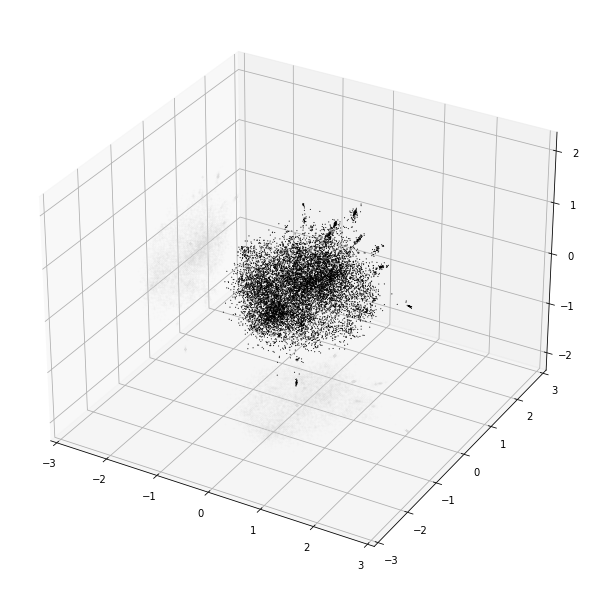

In [9]:
mde.plot(colors=['black'])
# plot from x=-3 to 3
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [16]:
# export in w2v format
fname = f'./work/data/pymde_{embedding_dim}d_{n_neighbors}n.w2v'
with open(fname, 'wt') as f:
    # write header
    f.write('{} {}\n'.format(len(X), mde.embedding_dim))
    for i in range(len(X)):
        row = X[i].tolist()
        f.write('{} {}\n'.format(i, ' '.join(map(str, row))))
fname

'./work/data/pymde_4d_100n.w2v'